**Issue 7**

In [282]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Establishing connection to the SQLite database
con = sqlite3.connect(r"C:\Users\Ishaan\Documents\GitHub\UMD-INST627-Fall2024\data\nba.sqlite")

Question 1: How has the difference in win-loss ratio between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)


Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3462412159.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_all = covid_wl_all.replace({'W': 1, 'L': 0})


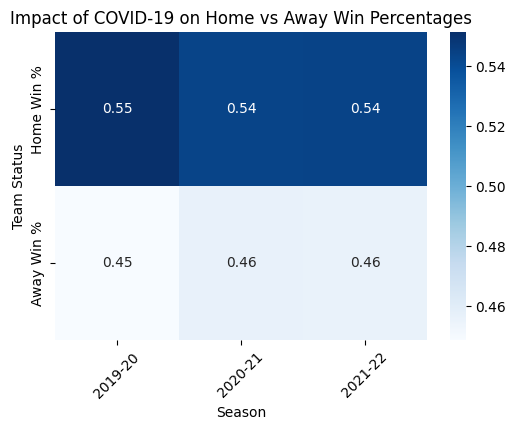

In [283]:
# Query for all relevant seasons
covid_wl_all = pd.read_sql_query(
    "SELECT season_id, wl_home, wl_away FROM game WHERE season_id IN (22019, 22020, 22021) ORDER BY season_id", con
)
covid_wl_all = covid_wl_all.replace({'W': 1, 'L': 0})

# Group data by season and calculate mean win percentages
covid_wl_all_group = covid_wl_all.groupby('season_id').agg({'wl_home': 'mean', 'wl_away': 'mean'}).reset_index()
covid_wl_all_group.columns = ['Season', 'Home Win %', 'Away Win %']

# Format data for heatmap
heatmap_data = covid_wl_all_group.set_index('Season')[['Home Win %', 'Away Win %']].T

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar=True, fmt=".2f")
plt.title("Impact of COVID-19 on Home vs Away Win Percentages", fontsize=12)
plt.xlabel("Season")
plt.ylabel("Team Status")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['2019-20', '2020-21', '2021-22'], rotation=45)
plt.show()


Rising Action: The first statistic we reviewed was the difference in win-loss ratio between home and away teams. In the 2019-20 season, the home team won 55.1% of games while the away team won 44.8%. While this does indicate a definite advantage towards the home team, the away team still has a decent chance of winning. This season was the last "normal" season before COVID, with the 2020-21 season cut short and resumed in a bubble and the 2021-22 season played without spectators in the team's usual arenas. While those restrictions would be assumed to have a significant impact on the win-loss ratio, our findings did not support that assumption.

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\2647208682.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_19 = covid_wl_19.replace({'W': 1, 'L': 0})


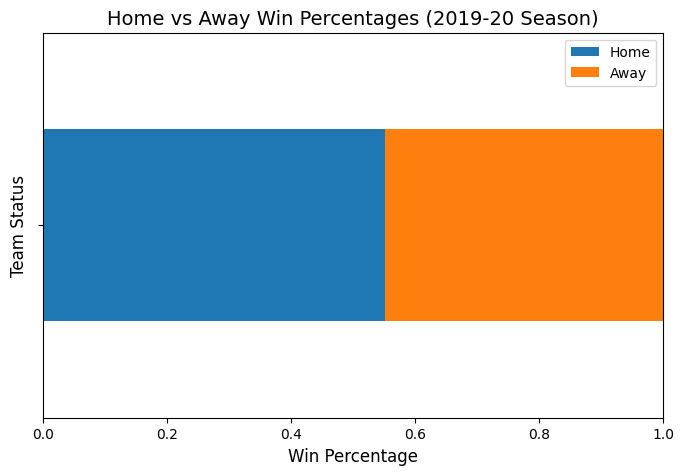

In [194]:
# Query for the 2019-20 season
covid_wl_19 = pd.read_sql_query(
    "SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22019)", con
)
covid_wl_19 = covid_wl_19.replace({'W': 1, 'L': 0})

# Calculate the average win percentages for home and away teams
covid_wl_19_group = covid_wl_19.agg({'wl_home': 'mean', 'wl_away': 'mean'})

# Create a new DataFrame to plot as a stacked bar
stacked_data = pd.DataFrame({
    'Home': [covid_wl_19_group['wl_home']],
    'Away': [covid_wl_19_group['wl_away']]
})

# Plot horizontal stacked bar chart
ax = stacked_data.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 5))

# Set chart labels and title
ax.set_title('Home vs Away Win Percentages (2019-20 Season)', fontsize=14)
ax.set_xlabel('Win Percentage', fontsize=12)
ax.set_ylabel('Team Status', fontsize=12)
ax.set_xlim(0, 1)  # Ensure the x-axis ranges from 0 to 1 for percentage display
ax.set_yticklabels([''])  # Remove y-tick labels as we only need the "Home" and "Away" categories

# Display the plot
plt.show()


Climax: In the 2020-21 and 2021-22 seasons, the home team win-loss ratio decreased slightly to 54.3% and 54.4% respectively. However, that decrease is not significant enough to support the assumption described above (note: need a hypothesis test to confirm). Similarly, while the away team win-loss ratio increased slightly to 45.6% in both seasons that decrease is not significant enough to indicate a shift in home court advantage (note: need a hypothesis test to confirm). Home teams still had a significant advantage over away teams, regardless of whether the game was played without fans or in a bubble.

           team_name_home wl_home         team_name_away wl_away season_id
0         Milwaukee Bucks       W          Brooklyn Nets       L     22021
1      Los Angeles Lakers       L  Golden State Warriors       W     22021
2  Portland Trail Blazers       L       Sacramento Kings       W     22021
3            Phoenix Suns       L         Denver Nuggets       W     22021
4  Minnesota Timberwolves       W        Houston Rockets       L     22021


C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3966453936.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_20['wl_home'] = covid_wl_20['wl_home'].replace({'W': 1, 'L': 0})
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3966453936.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_20['wl_away'] = covid_wl_20['wl_away'].replace({'W': 1, 'L': 0})
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3966453936.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after 

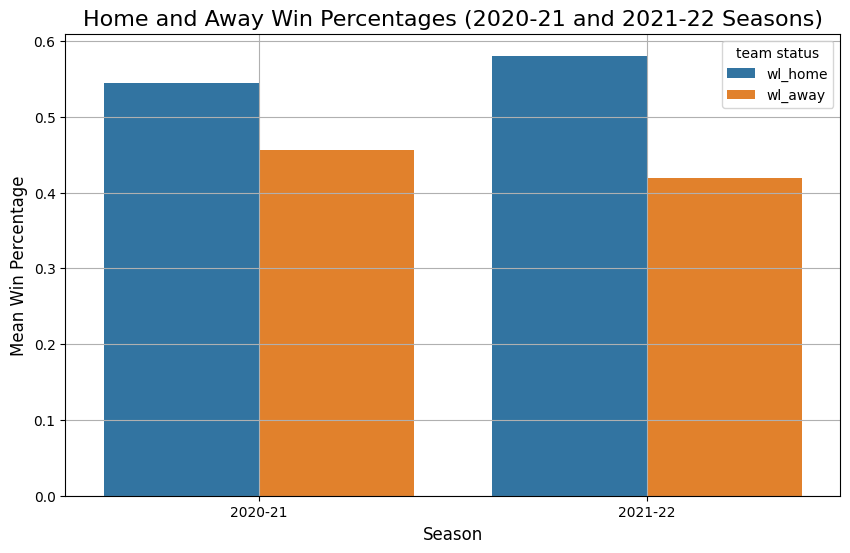

In [205]:
# Fetching data for the 2020-21 and 2021-22 seasons
covid_wl_20 = pd.read_sql_query(
    "SELECT team_name_home, wl_home, team_name_away, wl_away, season_id FROM game WHERE season_id IN (22021, 22022)", con
)
print(covid_wl_20.head())

# Replacing 'W' with 1 and 'L' with 0
covid_wl_20['wl_home'] = covid_wl_20['wl_home'].replace({'W': 1, 'L': 0})
covid_wl_20['wl_away'] = covid_wl_20['wl_away'].replace({'W': 1, 'L': 0})

# Check that the season_id and mean win percentage are in the correct format
covid_wl_melt['season_id'] = covid_wl_melt['season_id'].astype(str)  # Ensure 'season_id' is a string
covid_wl_melt['mean win percentage'] = covid_wl_melt['mean win percentage'].astype(float)  # Ensure the percentage is a float

# Plot using seaborn barplot for clearer comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=covid_wl_melt, x='season_id', y='mean win percentage', hue='team status')

# Set titles and labels
ax.set_title('Home and Away Win Percentages (2020-21 and 2021-22 Seasons)', fontsize=16)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Mean Win Percentage', fontsize=12)

# Set custom x-ticks
ax.set_xticklabels(['2020-21', '2021-22'], fontsize=10)

# Add gridlines for clarity
ax.grid(True)

# Show the plot
plt.show()



Falling Action: While the 2020-21 and 2021-22 seasons did not include a significant change in the magnitude of home court advantage, the 2022-23 season may have. The home team win-loss ratio increased by 3.6 points to 58% (note: need a hypothesis test to confirm). This may be due to spectators returning to arenas following the lifting of most COVID restrictions. Alternatively, this may be due to away teams being less used to home fans.


C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3613888801.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_falling['wl_home'] = covid_wl_falling['wl_home'].replace({'W': 1, 'L': 0})
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3613888801.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl_falling['wl_away'] = covid_wl_falling['wl_away'].replace({'W': 1, 'L': 0})
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\3613888801.py:29: UserWarning: set_ticklabels() should only be used with a fixed number

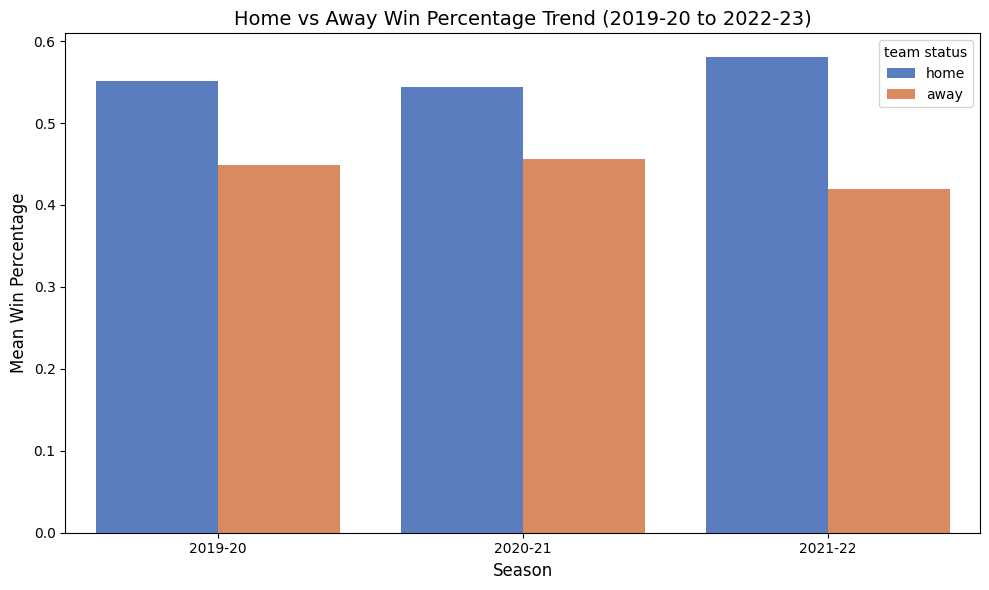

In [207]:
covid_wl_falling = pd.read_sql_query("""
    SELECT team_name_home, wl_home, team_name_away, wl_away, season_id
    FROM game
    WHERE season_id IN (22019, 22021, 22022, 22023)
    ORDER BY season_id DESC
""", con)

# Replacing 'W' with 1 and 'L' with 0 for win-loss columns
covid_wl_falling['wl_home'] = covid_wl_falling['wl_home'].replace({'W': 1, 'L': 0})
covid_wl_falling['wl_away'] = covid_wl_falling['wl_away'].replace({'W': 1, 'L': 0})

# Grouping by season and calculating the average win percentage for home and away teams
covid_wl_falling_group = covid_wl_falling.groupby(['season_id']).agg({'wl_home': ['mean'], 'wl_away': ['mean']})
covid_wl_falling_group.columns = ['home', 'away']  # Renaming columns
covid_wl_falling_group = covid_wl_falling_group.reset_index()

# Melting the dataframe for better visualization with 'team status' as hue
covid_wl_falling_melt = pd.melt(covid_wl_falling_group, id_vars=['season_id'], value_vars=['home', 'away'], var_name='team status', value_name='mean win percentage')

# Plotting the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=covid_wl_falling_melt, x='season_id', y='mean win percentage', hue='team status', palette='muted')

# Adding titles and labels
ax.set_title('Home vs Away Win Percentage Trend (2019-20 to 2022-23)', fontsize=14)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Mean Win Percentage', fontsize=12)
ax.set_xticklabels(['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)

# Showing the plot
plt.tight_layout()
plt.show()

Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons do not appear to have had a significant impact on home court advantage as measured by the difference in win-loss ratio between home and away teams. We recommend additional research to determine if the full return of fans in the 2022-23 seasons led to the observed increase in the ratio.

Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

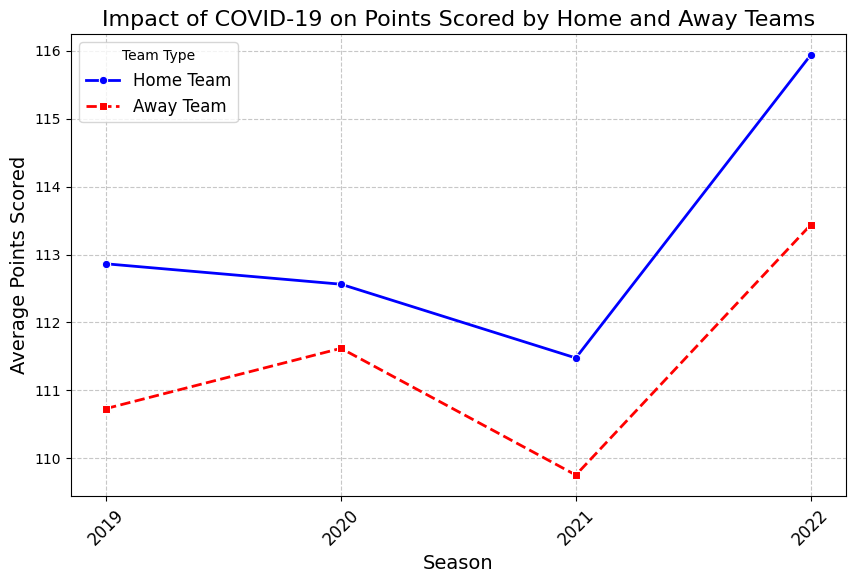

In [213]:
covid_pts = pd.read_sql_query("SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id IN (22019, 22020, 22021, 22022) ORDER BY season_id DESC", con)

# Ensure the points are numeric for proper calculations
covid_pts['pts_home'] = pd.to_numeric(covid_pts['pts_home'], errors='coerce')
covid_pts['pts_away'] = pd.to_numeric(covid_pts['pts_away'], errors='coerce')

# Group by season to calculate the average points scored by home and away teams
covid_pts_group = covid_pts.groupby(['season_id']).agg({'pts_home': 'mean', 'pts_away': 'mean'}).reset_index()

# Convert 'season_id' to string and format it to show the year (e.g., 2019 instead of 22019)
covid_pts_group['season_id'] = covid_pts_group['season_id'].astype(str).str[1:]  # Removes the first digit (2)

# Create a line plot to visually inspect changes in points scored over seasons
plt.figure(figsize=(10,6))

# Plot the home team's average points with a solid line and blue color
sns.lineplot(data=covid_pts_group, x='season_id', y='pts_home', label='Home Team', marker='o', color='blue', linewidth=2)

# Plot the away team's average points with a dashed line and red color
sns.lineplot(data=covid_pts_group, x='season_id', y='pts_away', label='Away Team', marker='s', color='red', linestyle='--', linewidth=2)

# Customize the plot's title, axes labels, and other visual elements
plt.title('Impact of COVID-19 on Points Scored by Home and Away Teams', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Points Scored', fontsize=14)

# Customizing x-ticks for better readability
plt.xticks(rotation=45, fontsize=12)

# Make the grid lines lighter for clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend
plt.legend(title='Team Type', fontsize=12)

# Display the plot
plt.show()





Rising Action: The second statistic we reviewed was the difference in average points scored by the home and away teams in each season. In the 2019-20 season, home teams scored an average of 2.04 points more than away teams, with half of all home scores falling between 100 points and 120 points. While this does indicate a consistent home team advantage on average, it was not a significant advantage.

Average Points Scored by Home Teams in 2019-20: 112.86
Average Points Scored by Away Teams in 2019-20: 110.73
Point Difference (Home - Away) in 2019-20: 2.13


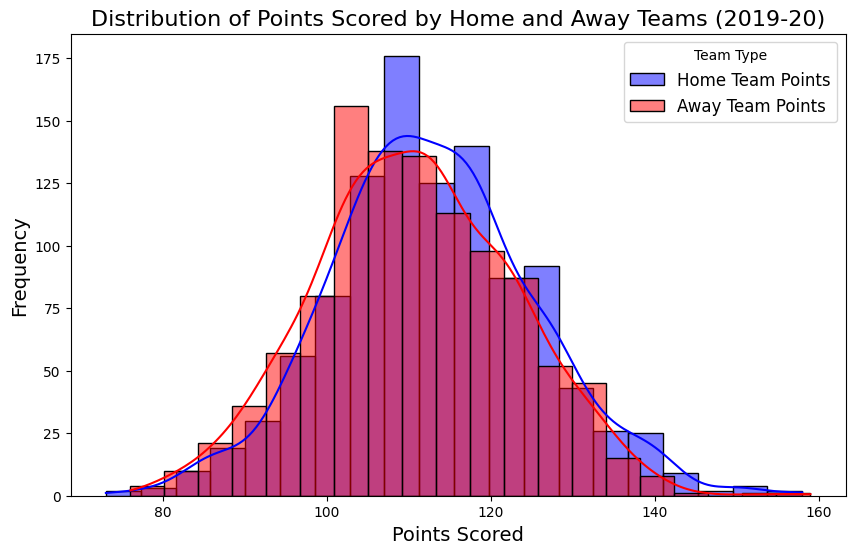

In [214]:
covid_pts_2019 = pd.read_sql_query("SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id = 22019", con)

# Ensure points data is numeric
covid_pts_2019['pts_home'] = pd.to_numeric(covid_pts_2019['pts_home'], errors='coerce')
covid_pts_2019['pts_away'] = pd.to_numeric(covid_pts_2019['pts_away'], errors='coerce')

# Calculate the difference in average points scored by home and away teams
home_avg_pts = covid_pts_2019['pts_home'].mean()
away_avg_pts = covid_pts_2019['pts_away'].mean()
point_difference = home_avg_pts - away_avg_pts

# Display the average points and the point difference
print(f"Average Points Scored by Home Teams in 2019-20: {home_avg_pts:.2f}")
print(f"Average Points Scored by Away Teams in 2019-20: {away_avg_pts:.2f}")
print(f"Point Difference (Home - Away) in 2019-20: {point_difference:.2f}")

# Create a histogram to show the distribution of points scored by home teams in 2019-20
plt.figure(figsize=(10, 6))
sns.histplot(covid_pts_2019['pts_home'], bins=20, kde=True, color='blue', label='Home Team Points')
sns.histplot(covid_pts_2019['pts_away'], bins=20, kde=True, color='red', label='Away Team Points')

# Customize the plot's title, labels, and visual elements
plt.title('Distribution of Points Scored by Home and Away Teams (2019-20)', fontsize=16)
plt.xlabel('Points Scored', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display a legend
plt.legend(title='Team Type', fontsize=12)

# Show the plot
plt.show()


Climax: This advantage continued into the 2020-21 and 2021-22 seasons, although it was reduced in the former season from 2.04 points to 1.09 points. However, the advantage mostly recovered in the 2021-22 season, increasing to 1.96 points. This may be due to teams performing better once they exited the bubble and returned to their home arenas, however the advantage remained relatively minor.

          team_name_home  pts_home        team_name_away  pts_away season_id
0         Boston Celtics     126.0    Philadelphia 76ers     117.0     22022
1  Golden State Warriors     123.0    Los Angeles Lakers     109.0     22022
2        Detroit Pistons     113.0         Orlando Magic     109.0     22022
3              Utah Jazz     123.0        Denver Nuggets     102.0     22022
4          Brooklyn Nets     108.0  New Orleans Pelicans     130.0     22022
  season_id    pts_home    pts_away
0     22020  112.562963  111.619444
1     22021  111.477236  109.754472
2     22022  115.935772  113.435772
season_id            object
pts_home            float64
pts_away            float64
season               object
point_difference    float64
dtype: object
   season_id    pts_home    pts_away   season  point_difference
0      22020  112.562963  111.619444  2020-21          0.943519
1      22021  111.477236  109.754472  2021-22          1.722764
2      22022  115.935772  113.435772  2022-23   

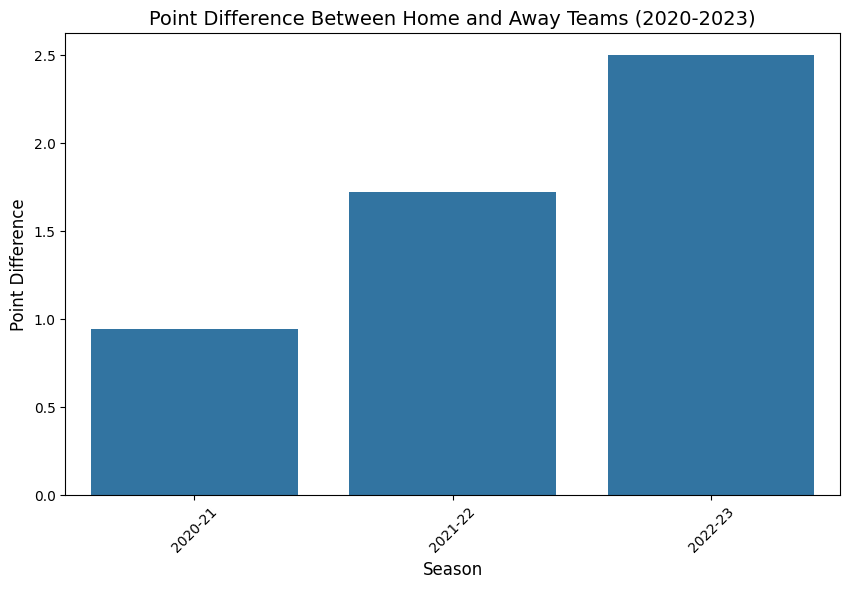

In [232]:
# Query to get the relevant data
covid_pts_2021_2023 = pd.read_sql_query(
    "SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id IN (22020, 22021, 22022) ORDER BY season_id DESC",
    con)

# Check the data
print(covid_pts_2021_2023.head())

# Group the data by season_id and calculate the mean of pts_home and pts_away
covid_pts_2021_2023_group = covid_pts_2021_2023.groupby(['season_id']).agg({'pts_home': 'mean', 'pts_away': 'mean'}).reset_index()

# Check the grouped data
print(covid_pts_2021_2023_group)

# Mapping season_id to readable season names
season_mapping = {22020: '2020-21', 22021: '2021-22', 22022: '2022-23'}
covid_pts_2021_2023_group['season'] = covid_pts_2021_2023_group['season_id'].map(season_mapping)

# Calculate the point difference
covid_pts_2021_2023_group['point_difference'] = covid_pts_2021_2023_group['pts_home'] - covid_pts_2021_2023_group['pts_away']
# Check the data types of your columns
print(covid_pts_2021_2023_group.dtypes)

# Ensure season_id is in the correct format (integer)
covid_pts_2021_2023_group['season_id'] = covid_pts_2021_2023_group['season_id'].astype(int)

# Mapping season_id to readable season names
season_mapping = {22020: '2020-21', 22021: '2021-22', 22022: '2022-23'}
covid_pts_2021_2023_group['season'] = covid_pts_2021_2023_group['season_id'].map(season_mapping)

# Check the data again
print(covid_pts_2021_2023_group)

# Now calculate the point difference
covid_pts_2021_2023_group['point_difference'] = covid_pts_2021_2023_group['pts_home'] - covid_pts_2021_2023_group['pts_away']

# Verify the final DataFrame
print(covid_pts_2021_2023_group)

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='point_difference', data=covid_pts_2021_2023_group)

# Add title and labels
plt.title('Point Difference Between Home and Away Teams (2020-2023)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Point Difference', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Falling Action: As fans returned in the 2022-23 season, the average home team points advantage continued to increase and reached 2.61 points. This increase may be due to the return of home fans leading to an increase in home court advantage, however additional analysis will be required to determine the cause of this increase.

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\2024269392.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Home', 'Away'], fontsize=10)


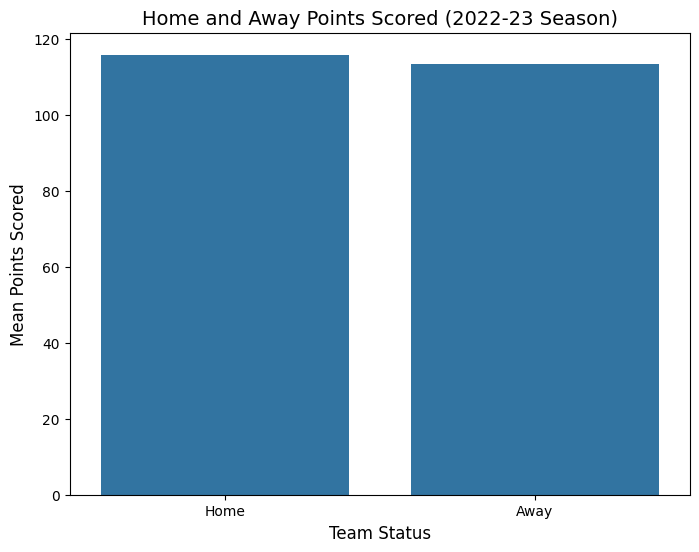

In [247]:
# Query to get the relevant data for the 2022-23 season
covid_pts_22 = pd.read_sql_query(
    "SELECT team_name_home, pts_home, team_name_away, pts_away, season_id FROM game WHERE season_id = 22022 ORDER BY season_id DESC", con)

# Group the data by season_id and calculate the mean of pts_home and pts_away
covid_pts_22_group = covid_pts_22.groupby('season_id').agg({'pts_home': 'mean', 'pts_away': 'mean'}).reset_index()


covid_pts_22_group_melted = covid_pts_22_group.melt(id_vars='season_id', value_vars=['pts_home', 'pts_away'],
                                                    var_name='team_status', value_name='mean_points')

# Assign the season name
covid_pts_22_group_melted['season'] = '2022-23'

# Plotting the mean points for home and away teams
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='team_status', y='mean_points', data=covid_pts_22_group_melted)

# Adding the title and labels
ax.set_title('Home and Away Points Scored (2022-23 Season)', fontsize=14)
ax.set_xlabel('Team Status', fontsize=12)
ax.set_ylabel('Mean Points Scored', fontsize=12)
ax.set_xticklabels(['Home', 'Away'], fontsize=10)

# Show the plot
plt.show()



Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons may have had an impact on the level of home court advantage as measured by the difference between home and away points scored. However, that impact does not appear to be significant and recovered by the 2022-23 season.

Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

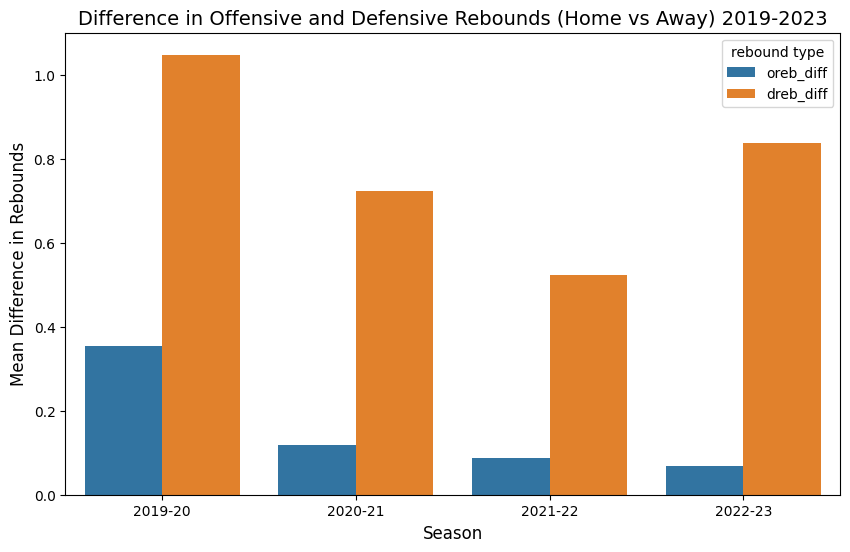

In [250]:

covid_reb = pd.read_sql_query("""
    SELECT team_name_home, oreb_home, dreb_home, team_name_away, oreb_away, dreb_away, season_id
    FROM game
    WHERE season_id IN (22019, 22020, 22021, 22022)
    ORDER BY season_id DESC
""", con)

# Group the data by season_id and calculate the mean for offensive and defensive rebounds
covid_reb_group = covid_reb.groupby(['season_id']).agg({
    'oreb_home': 'mean',
    'oreb_away': 'mean',
    'dreb_home': 'mean',
    'dreb_away': 'mean'
})

# Calculate the differences for offensive and defensive rebounds (home - away)
covid_reb_group['oreb_diff'] = covid_reb_group['oreb_home'] - covid_reb_group['oreb_away']
covid_reb_group['dreb_diff'] = covid_reb_group['dreb_home'] - covid_reb_group['dreb_away']

# Reset the index
covid_reb_group = covid_reb_group.reset_index()

# Prepare the data for plotting by melting the dataframe
rebounds_diff = pd.melt(covid_reb_group, id_vars=['season_id'],
                        value_vars=['oreb_diff', 'dreb_diff'],
                        var_name='rebound type', value_name='mean difference')

# Create a bar plot to visualize the difference in rebounds over seasons
plt.figure(figsize=(10, 6))
sns.barplot(data=rebounds_diff, x='season_id', y='mean difference', hue='rebound type')

# Customize the plot
plt.title('Difference in Offensive and Defensive Rebounds (Home vs Away) 2019-2023', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Mean Difference in Rebounds', fontsize=12)
plt.xticks([0, 1, 2, 3], ['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)

# Display the plot
plt.show()


Rising Action: The third statistic we reviewed was the difference in average offensive and defensive rebounds scored by the home and away teams in each season. In the 2019-20 season, home teams scored an average of 0.38 more offensive rebounds and 0.95 defensive rebounds compared to away teams. While this does indicate a slight advantage towards home teams, it is less than a single rebound on average.

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\413692946.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rising_action_df,


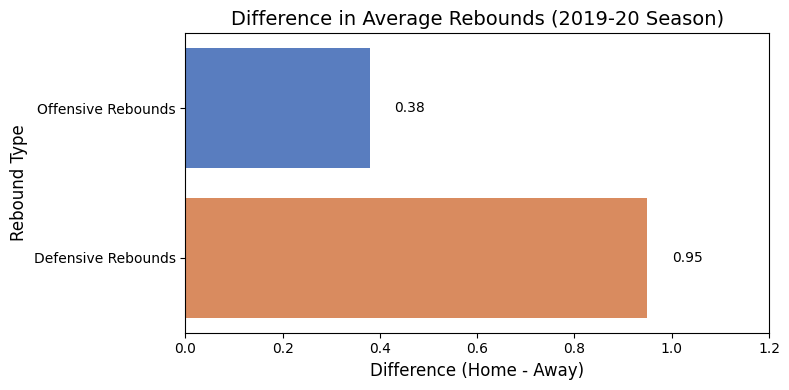

In [251]:
# Create a DataFrame for the rising action values
rising_action_data = {
    'Rebound Type': ['Offensive Rebounds', 'Defensive Rebounds'],
    'Difference (Home - Away)': [0.38, 0.95]
}

rising_action_df = pd.DataFrame(rising_action_data)

# Set up the plot
plt.figure(figsize=(8, 4))
sns.barplot(data=rising_action_df,
            x='Difference (Home - Away)',
            y='Rebound Type',
            palette='muted')

# Add annotations for clarity
for index, value in enumerate(rising_action_df['Difference (Home - Away)']):
    plt.text(value + 0.05, index, f"{value:.2f}", color='black', va='center')

# Customize the plot
plt.title('Difference in Average Rebounds (2019-20 Season)', fontsize=14)
plt.xlabel('Difference (Home - Away)', fontsize=12)
plt.ylabel('Rebound Type', fontsize=12)
plt.xlim(0, 1.2)  # Adjust the x-axis for clarity

# Display the plot
plt.tight_layout()
plt.show()

Climax: This slight difference between home and away teams became even more slight following the introduction of COVID restrictions. Home teams scored only 0.15 more offensive rebounds on average in the 2020-21 season, with the difference reducing further to 0.07 rebounds in the 2021-22 season. On the defensive rebound side, the difference was cut almost in half by the 2021-22 season, with home teams scoring 0.54 more rebounds that away teams in that season. This could be an indication of a reduction of the level of home court advantage, although additional analysis is required to confirm this finding.

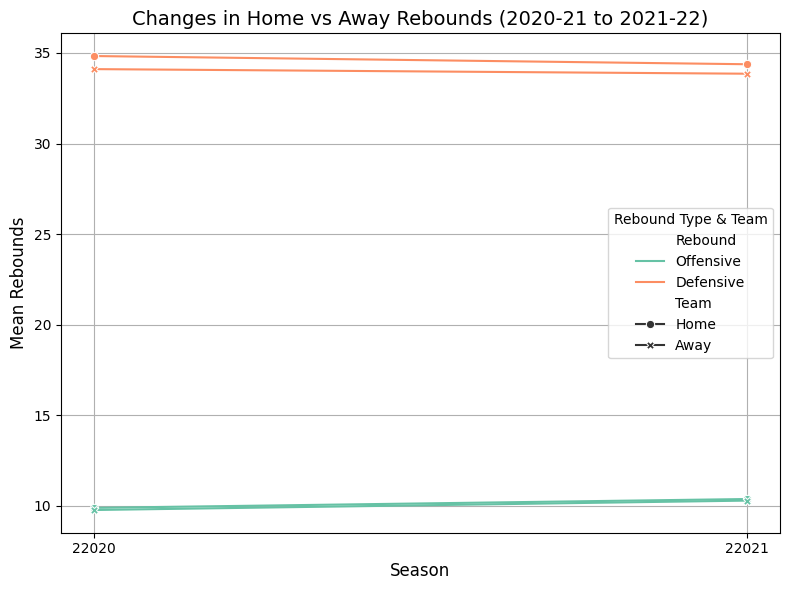

In [252]:
# Query to fetch rebound data for 2020-21 and 2021-22 seasons
covid_reb_20 = pd.read_sql_query("""
    SELECT season_id, oreb_home, oreb_away, dreb_home, dreb_away
    FROM game
    WHERE season_id IN (22020, 22021)
    ORDER BY season_id DESC
    """, con)

# Group data by season and calculate mean rebounds
covid_reb_20_group = covid_reb_20.groupby('season_id').agg({
    'oreb_home': 'mean', 'oreb_away': 'mean',
    'dreb_home': 'mean', 'dreb_away': 'mean'
}).reset_index()

# Replace season IDs for better readability
covid_reb_20_group['season_id'] = covid_reb_20_group['season_id'].replace({
    22020: '2020-21', 22021: '2021-22'
})

# Melt data for plotting
covid_reb_20_melt = pd.melt(covid_reb_20_group, id_vars='season_id',
                            value_vars=['oreb_home', 'oreb_away', 'dreb_home', 'dreb_away'],
                            var_name='Rebound Type', value_name='Mean Rebounds')

# Extract categories for clarity
covid_reb_20_melt['Rebound'] = covid_reb_20_melt['Rebound Type'].apply(lambda x: 'Offensive' if 'oreb' in x else 'Defensive')
covid_reb_20_melt['Team'] = covid_reb_20_melt['Rebound Type'].apply(lambda x: 'Home' if 'home' in x else 'Away')

# Line Plot: Mean Rebounds by Season for Home/Away and Offensive/Defensive
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=covid_reb_20_melt,
                  x='season_id', y='Mean Rebounds',
                  hue='Rebound', style='Team',
                  markers=True, dashes=False, palette='Set2')

# Customize the plot
plt.title('Changes in Home vs Away Rebounds (2020-21 to 2021-22)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Mean Rebounds', fontsize=12)
plt.legend(title='Rebound Type & Team', fontsize=10)
plt.xticks([0, 1], ['2020-21', '2021-22'], fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


Falling Action: While the differences in average offensive and defensive rebounds both decreased following the introduction of COVID restrictions, the lifting of those restrictions did not result in a uniform increase. The average difference between home and away offensive rebounds actually continued to decrease, reaching 0.066 rebounds in the 2022-23 season. On the other hand, the average difference in defense rebounds rebounded to just under its original mark with an average difference of 0.94 rebounds in the 2022-23 season.

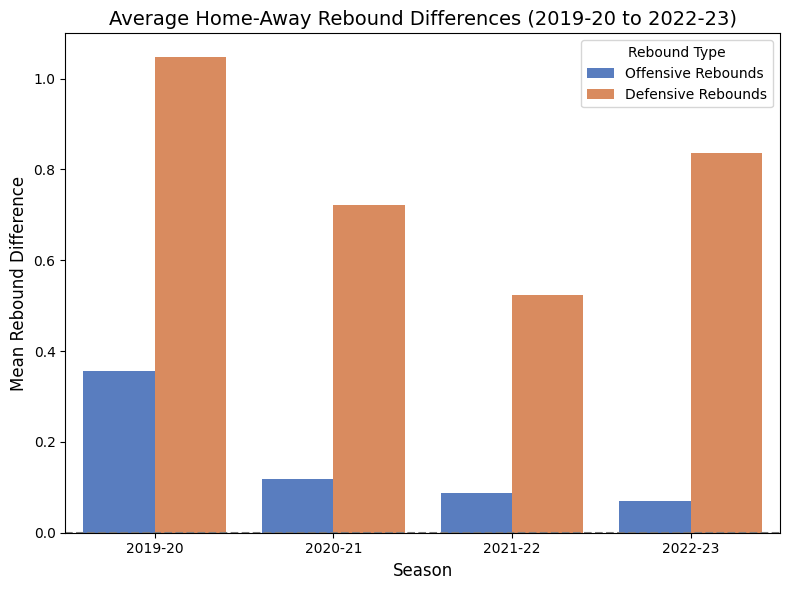

In [284]:
# Query to fetch rebound data for all 4 seasons
reb_diff = pd.read_sql_query("""
    SELECT season_id, oreb_home - oreb_away AS oreb_diff, dreb_home - dreb_away AS dreb_diff
    FROM game
    WHERE season_id IN (22019, 22020, 22021, 22022)
    """, con)

# Group by season and calculate mean differences
reb_diff_group = reb_diff.groupby('season_id').agg({
    'oreb_diff': 'mean', 'dreb_diff': 'mean'
}).reset_index()

# Replace season IDs for readability
reb_diff_group['season_id'] = reb_diff_group['season_id'].replace({
    22019: '2019-20', 22020: '2020-21', 22021: '2021-22', 22022: '2022-23'
})

# Melt the data for plotting
reb_diff_melt = pd.melt(reb_diff_group, id_vars='season_id',
                        value_vars=['oreb_diff', 'dreb_diff'],
                        var_name='Rebound Type', value_name='Mean Difference')

# Customize rebound type labels
reb_diff_melt['Rebound Type'] = reb_diff_melt['Rebound Type'].replace({
    'oreb_diff': 'Offensive Rebounds', 'dreb_diff': 'Defensive Rebounds'
})

# Bar Plot: Differences in Offensive and Defensive Rebounds
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=reb_diff_melt, x='season_id', y='Mean Difference', hue='Rebound Type', palette='muted')

# Customize the plot
plt.title('Average Home-Away Rebound Differences (2019-20 to 2022-23)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Mean Rebound Difference', fontsize=12)
plt.legend(title='Rebound Type', fontsize=10)
plt.xticks([0, 1, 2, 3], ['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)
plt.axhline(0, color='gray', linestyle='--')  # Reference line for 0
plt.tight_layout()
plt.show()


Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons may have had an impact on home court advantage as measured by the difference in average offensive and defensive rebounds between home and away teams. However, that impact does not appear to be significant.

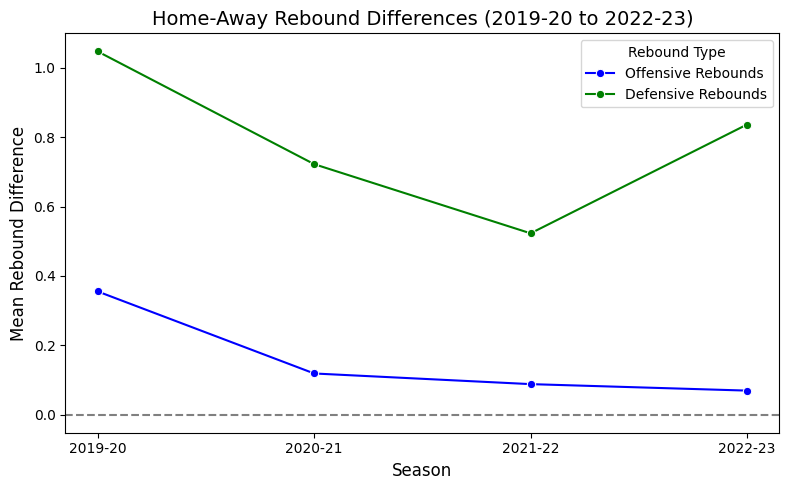

In [295]:
# Reuse the rebound difference group data
plt.figure(figsize=(8, 5))

# Plot offensive rebound differences
sns.lineplot(data=reb_diff_group, x='season_id', y='oreb_diff', marker='o', label='Offensive Rebounds', color='blue')

# Plot defensive rebound differences
sns.lineplot(data=reb_diff_group, x='season_id', y='dreb_diff', marker='o', label='Defensive Rebounds', color='green')

# Add titles and labels
plt.title('Home-Away Rebound Differences (2019-20 to 2022-23)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Mean Rebound Difference', fontsize=12)
plt.xticks([0, 1, 2, 3], ['2019-20', '2020-21', '2021-22', '2022-23'], fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(0, color='gray', linestyle='--')  # Add a reference line at 0
plt.legend(title='Rebound Type')
plt.tight_layout()

plt.show()


Question 4

Intro:During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

  season_year  avg_fg3_pct_home  avg_fg3_pct_away
0     2019-20          0.361288          0.353899
1     2020-21          0.368503          0.362280
2     2021-22          0.354627          0.351595
3     2022-23          0.365037          0.353528


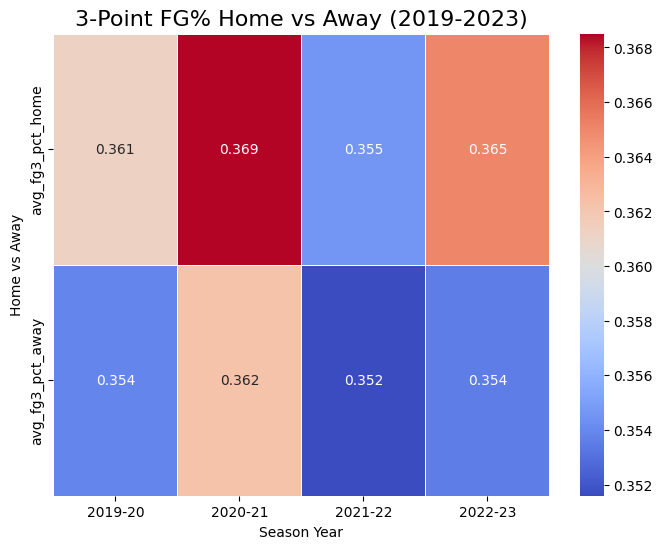

In [307]:
# Correct season_id to season_year mapping
season_mapping = {
    22019: '2019-20',
    22020: '2020-21',
    22021: '2021-22',
    22022: '2022-23',
}

# List to store the result for each season
result = []

# Loop through the mapping to fetch data for each season
for season_id, season_year in season_mapping.items():
    # SQL query to get the average three-point field goal percentage
    query = f"""
    SELECT
        AVG(fg3_pct_home) AS avg_fg3_pct_home,
        AVG(fg3_pct_away) AS avg_fg3_pct_away
    FROM game
    WHERE season_id = {season_id};
    """

    # Fetch the data from the database
    fg3_data = pd.read_sql_query(query, con)  # Assuming 'con' is your database connection

    # If data is available, append to the result list
    if not fg3_data.empty:
        result.append({
            'season_year': season_year,
            'avg_fg3_pct_home': fg3_data['avg_fg3_pct_home'][0],
            'avg_fg3_pct_away': fg3_data['avg_fg3_pct_away'][0]
        })

# Convert the result list to a DataFrame for easier handling
result_df = pd.DataFrame(result)

# Check if the result dataframe has been populated correctly
print(result_df)

# Visualization
# Reshape data for a heatmap
heatmap_data = result_df.set_index('season_year')[['avg_fg3_pct_home', 'avg_fg3_pct_away']].transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.3f', linewidths=0.5)
plt.title('3-Point FG% Home vs Away (2019-2023)', fontsize=16)
plt.xlabel('Season Year')
plt.ylabel('Home vs Away')
plt.show()

Rising action: The fourth statistic we reviewed was the difference in the average succcessful three-point field goal percentage by home and away teams. In the 2019-20 season, home teams successfully scored slightly more field goals on average compared to away teams (36.1% vs 35.4%), however that difference is less than a percentage point and may not be statistically significant.

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\886967704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home', 'Away'], y=[data_2019['avg_fg3_pct_home'].values[0], data_2019['avg_fg3_pct_away'].values[0]], palette=['skyblue', 'salmon'])


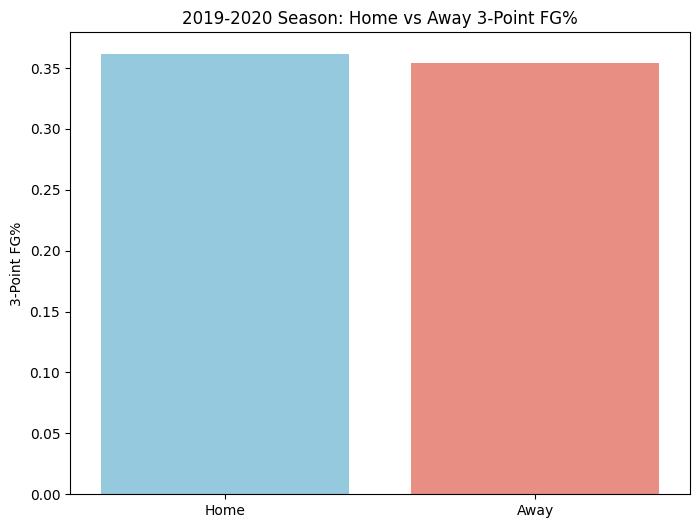

In [302]:
# Extract data for 2019-20 season
data_2019 = result_df[result_df['season_year'] == '2019-20']

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home', 'Away'], y=[data_2019['avg_fg3_pct_home'].values[0], data_2019['avg_fg3_pct_away'].values[0]], palette=['skyblue', 'salmon'])
plt.title('2019-2020 Season: Home vs Away 3-Point FG%')
plt.ylabel('3-Point FG%')
plt.show()


Climax: The difference continued to be relatively minor as COVID restrictions were instituted. While home teams continued to successfully score slightly more three-point field goals on average compared to away teams, they only scored 0.5 percentage points more in the 2020-21 and 2021-22 seasons. The raw percentage of field goals scored by both home and away teams did decrease slightly in the 2021-22 season, however that decrease may not be significant.

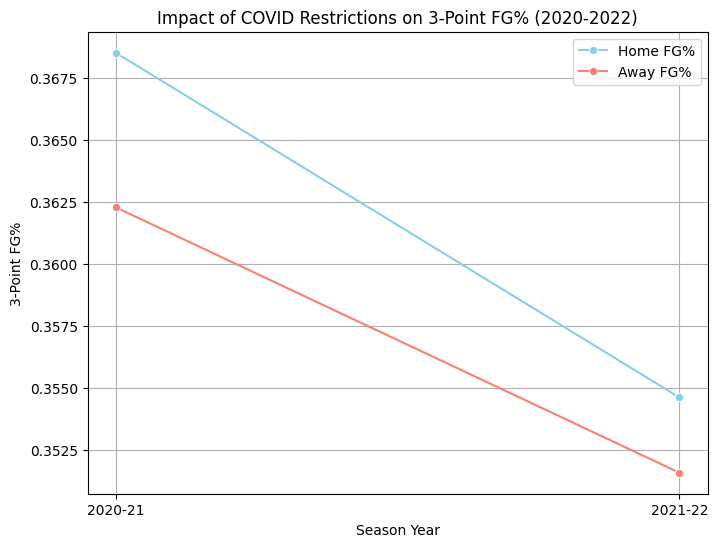

In [304]:
# Extract data for 2020-21 and 2021-22
data_covid = result_df[result_df['season_year'].isin(['2020-21', '2021-22'])]

plt.figure(figsize=(8, 6))
sns.lineplot(data=data_covid, x='season_year', y='avg_fg3_pct_home', label='Home FG%', marker='o', color='skyblue')
sns.lineplot(data=data_covid, x='season_year', y='avg_fg3_pct_away', label='Away FG%', marker='o', color='salmon')
plt.title('Impact of COVID Restrictions on 3-Point FG% (2020-2022)')
plt.xlabel('Season Year')
plt.ylabel('3-Point FG%')
plt.legend()
plt.grid(True)
plt.show()


Falling action: As COVID restrictions lifted in the 2022-23 season, the average successful three-point field goal percentage returned to rougly the values observed in the 2019-20 season, with the home average slightly above and the away percentage slightly below. Overall, the shift in the two percentages over the four seasons in our sample was less than two percentage points.

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_21540\2949270665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home', 'Away'], y=[data_2022['avg_fg3_pct_home'].values[0], data_2022['avg_fg3_pct_away'].values[0]], palette=['skyblue', 'salmon'])


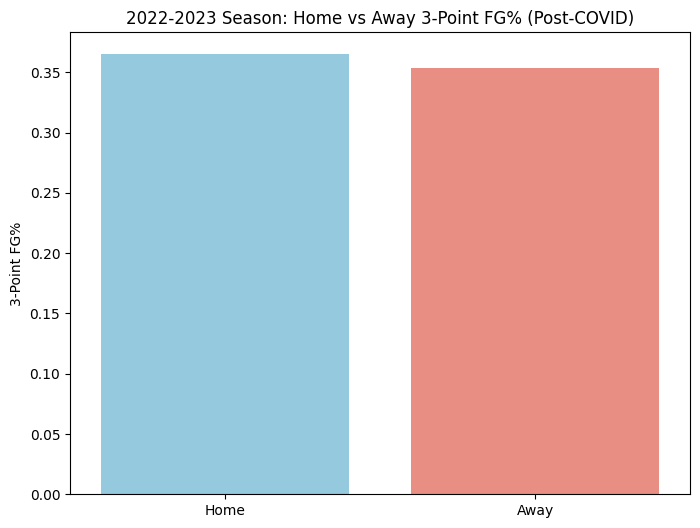

In [299]:
# Extract data for 2022-23 season
data_2022 = result_df[result_df['season_year'] == '2022-23']

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home', 'Away'], y=[data_2022['avg_fg3_pct_home'].values[0], data_2022['avg_fg3_pct_away'].values[0]], palette=['skyblue', 'salmon'])
plt.title('2022-2023 Season: Home vs Away 3-Point FG% (Post-COVID)')
plt.ylabel('3-Point FG%')
plt.show()

Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons did not appear to have had a significant impact on home court advantage as measured by the difference in the successful three-point field goal percentage between home and away teams.

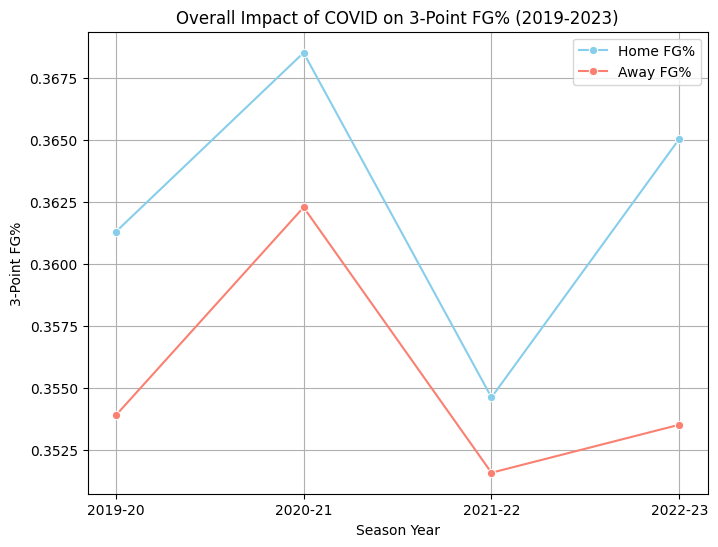

In [306]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=result_df, x='season_year', y='avg_fg3_pct_home', label='Home FG%', marker='o', color='skyblue')
sns.lineplot(data=result_df, x='season_year', y='avg_fg3_pct_away', label='Away FG%', marker='o', color='salmon')
plt.title('Overall Impact of COVID on 3-Point FG% (2019-2023)')
plt.xlabel('Season Year')
plt.ylabel('3-Point FG%')
plt.legend()
plt.grid(True)
plt.show()


Question 5

Intro: During the 2020-21 and 2021-22 NBA seasons, the league put COVID-19 restrictions in place to protect players and fans from infection while still allowing for some games to be played. These restrictions included playing the second half of the 2020-21 season in a bubble and playing the entirity of the 2021-22 season behind closed doors without fans. The league requested that our team conduct an analysis to determine the impact of those restrictions on the level of home court advantage, including whether any impact recovered following the lifting of those restrictions.

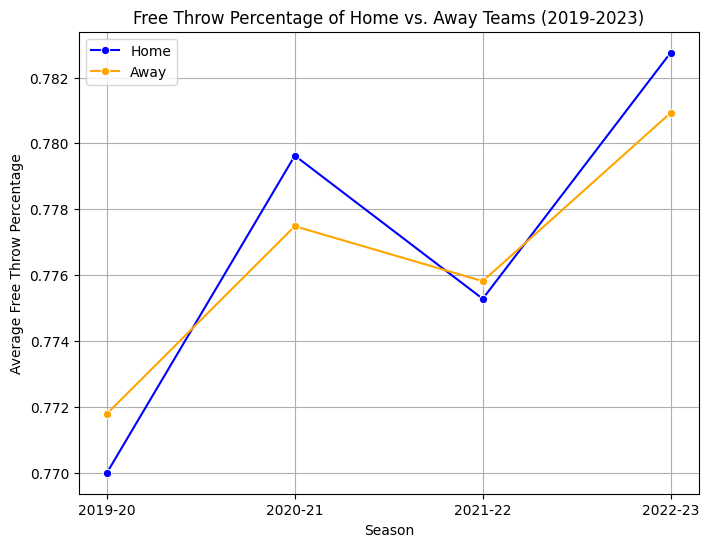

In [308]:
# Retrieve the data
seasons = ['22019', '22020', '22021', '22022']

result = []
for year in seasons:
    ft_query = f"""
    SELECT
        AVG(ft_pct_home) AS avg_ft_pct_home,
        AVG(ft_pct_away) AS avg_ft_pct_away
    FROM game
    WHERE season_id = {year}
    """

    ft_data = pd.read_sql_query(ft_query, con)

    if not ft_data.empty:
        avg_ft_pct_home = ft_data['avg_ft_pct_home'][0]
        avg_ft_pct_away = ft_data['avg_ft_pct_away'][0]

        result.append({
            'season_year': year,
            'avg_ft_pct_home': avg_ft_pct_home,
            'avg_ft_pct_away': avg_ft_pct_away
        })

result_df = pd.DataFrame(result)

# Visualizations for the story parts

# 1. Intro: Visualizing the trend of FT% for both home and away teams
plt.figure(figsize=(8, 6))
sns.lineplot(data=result_df, x='season_year', y='avg_ft_pct_home', label='Home', marker='o', color='blue')
sns.lineplot(data=result_df, x='season_year', y='avg_ft_pct_away', label='Away', marker='o', color='orange')
plt.xlabel('Season')
plt.ylabel('Average Free Throw Percentage')
plt.title('Free Throw Percentage of Home vs. Away Teams (2019-2023)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['2019-20', '2020-21', '2021-22', '2022-23'])
plt.legend()
plt.grid(True)
plt.show()

Rising Action: The final statistic we reviewed was the difference in the average succcessful field goal percentage by home and away teams. In the 2019-20 season, home teams made slightly more field goals on average compared to home teams (46.58% vs 45.66%). While this does indicate some home court advantage, it is not a significant advantage.

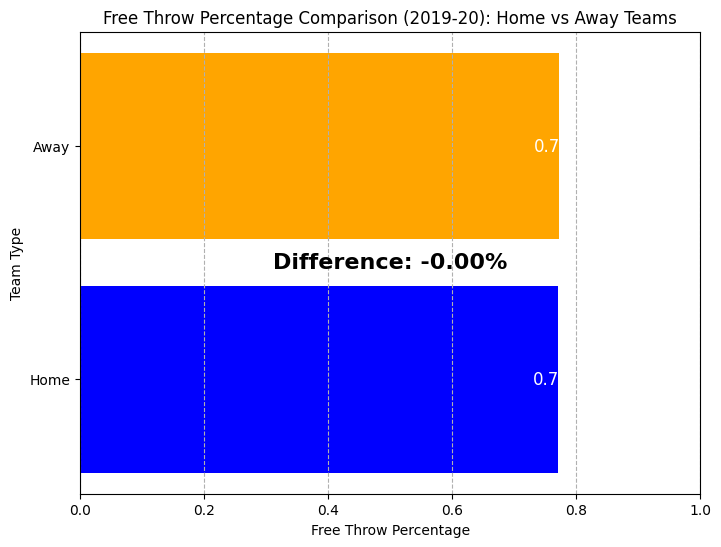

In [324]:
# Extract data for the 2019-20 season
season_2019 = result_df[result_df['season_year'] == '22019']

# Calculate the difference
diff = season_2019['avg_ft_pct_home'].values[0] - season_2019['avg_ft_pct_away'].values[0]

# Horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(['Home', 'Away'],
                [season_2019['avg_ft_pct_home'].values[0], season_2019['avg_ft_pct_away'].values[0]],
                color=['blue', 'orange'])

# Add labels for each bar
for bar in bars:
    plt.text(bar.get_width() - 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             ha='center', va='center', color='white', fontsize=12)

# Adding the difference label
plt.text(0.5, 0.5, f'Difference: {diff:.2f}%', fontsize=16, ha='center', va='center', color='black', fontweight='bold')

# Adding details
plt.title('Free Throw Percentage Comparison (2019-20): Home vs Away Teams')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Team Type')
plt.xlim(0, 1)  # Ensuring x-axis goes from 0 to 100%
plt.grid(True, axis='x', linestyle='--')

# Show plot
plt.show()




Climax: The difference continued to be relatively minor as COVID restrictions were instituted. The successful field goal percentages for home and away teams remained within half a percentage point in both the 2020-21 and 2021-22 seasons, with home teams having a slightly higher percentage in both. None of these differences appear to be significant when compared to the 2019-20 season.

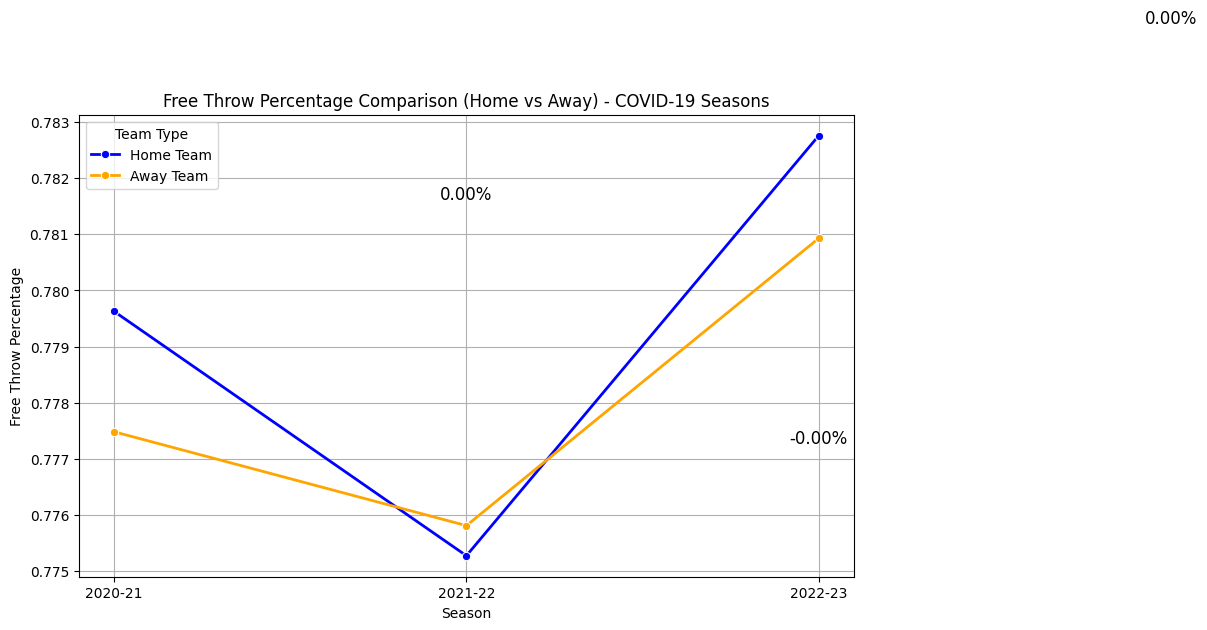

In [326]:
# Extract relevant seasons for the Climax section
seasons_climax = result_df[result_df['season_year'].isin(['22020', '22021', '22022'])]

# Create a line plot to compare home vs away free throw percentages over the seasons
plt.figure(figsize=(10, 6))

# Plot the Home team's FT% over the seasons
sns.lineplot(data=seasons_climax, x='season_year', y='avg_ft_pct_home', label='Home Team', marker='o', color='blue', linewidth=2)

# Plot the Away team's FT% over the seasons
sns.lineplot(data=seasons_climax, x='season_year', y='avg_ft_pct_away', label='Away Team', marker='o', color='orange', linewidth=2)

# Highlight the small difference between the two series
for i, row in seasons_climax.iterrows():
    diff = row['avg_ft_pct_home'] - row['avg_ft_pct_away']
    # Annotate with the difference value
    plt.text(i, row['avg_ft_pct_home'] + 0.002, f'{diff:.2f}%', ha='center', fontsize=12, color='black')

# Adding labels, title, and legend
plt.xlabel('Season')
plt.ylabel('Free Throw Percentage')
plt.title('Free Throw Percentage Comparison (Home vs Away) - COVID-19 Seasons')
plt.xticks(ticks=[0, 1, 2], labels=['2020-21', '2021-22', '2022-23'])
plt.legend(title="Team Type")
plt.grid(True)

# Show the plot
plt.show()




Falling Action: This pattern continued into the 2022-23 season. While both percentages rose slightly, they remained within half a percentage point of each other.Home teams continued to have an advantage over away teams, although the advantage remained relatively small.


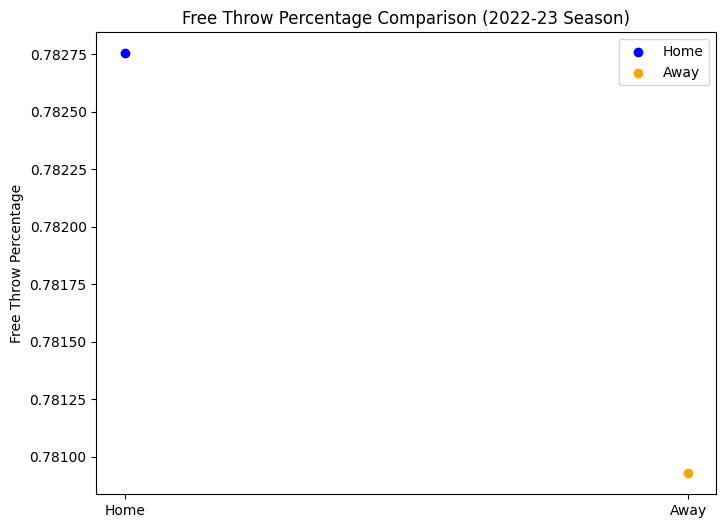

In [318]:
# Get data for the 2022-23 season
season_2022 = result_df[result_df['season_year'] == '22022']

# Plot the comparison using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(['Home']*len(season_2022['avg_ft_pct_home']), season_2022['avg_ft_pct_home'], color='blue', label='Home')
plt.scatter(['Away']*len(season_2022['avg_ft_pct_away']), season_2022['avg_ft_pct_away'], color='orange', label='Away')
plt.title('Free Throw Percentage Comparison (2022-23 Season)')
plt.ylabel('Free Throw Percentage')
plt.legend()
plt.show()




Conclusion: The COVID restrictions during the 2020-21 and 2021-22 seasons did not appear to have had a significant impact on home court advantage as measured by the difference in the successful field goal percentage between home and away teams.

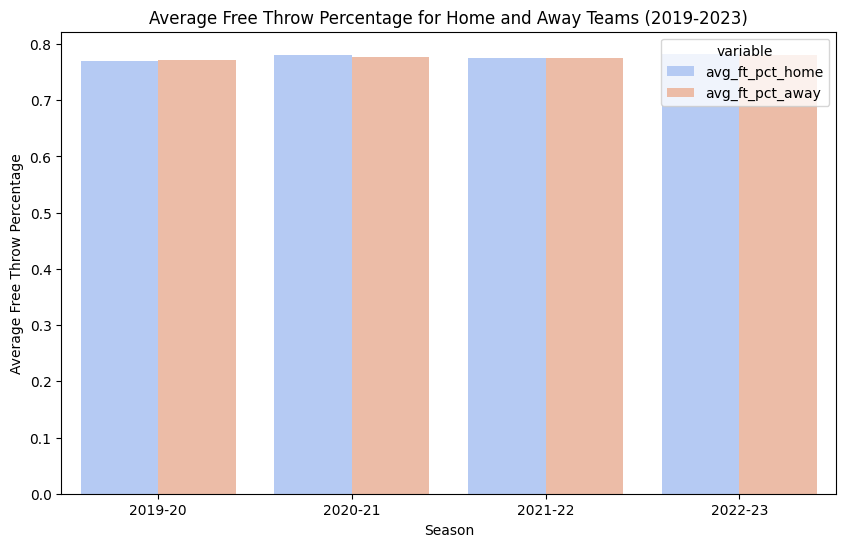

In [317]:
# Plot the bar plot comparing average free throw percentage for home and away teams across all seasons
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.melt(id_vars="season_year", value_vars=["avg_ft_pct_home", "avg_ft_pct_away"]),
            x='season_year', y='value', hue='variable', palette="coolwarm")
plt.title('Average Free Throw Percentage for Home and Away Teams (2019-2023)')
plt.xlabel('Season')
plt.ylabel('Average Free Throw Percentage')
plt.xticks(ticks=[0, 1, 2, 3], labels=['2019-20', '2020-21', '2021-22', '2022-23'])
plt.show()
